In [1]:
from figurex import Figure, Panel

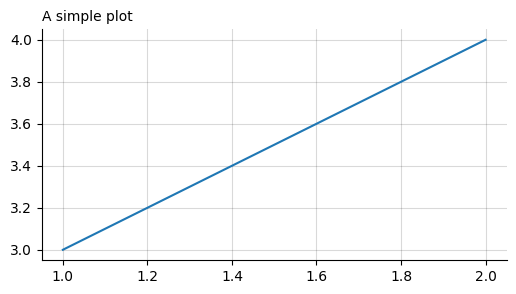

In [2]:
with Figure("A simple plot") as ax:
    ax.plot([1,2],[3,4])

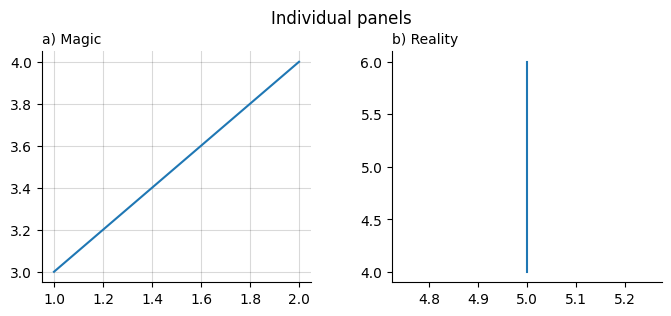

In [3]:
with Figure("Individual panels", layout=(1,2), size=(8,3)):
    with Panel("a) Magic") as ax:
        ax.plot([1,2],[3,4])
    with Panel("b) Reality", grid="") as ax:
        ax.plot([5,5],[6,4])

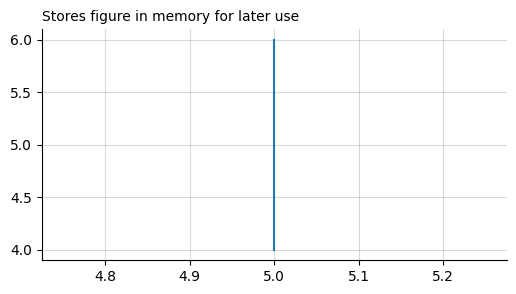

In [4]:
with Figure("Stores figure in memory for later use") as ax:
    ax.plot([5,5],[6,4])
memory = Figure.as_object()
memory

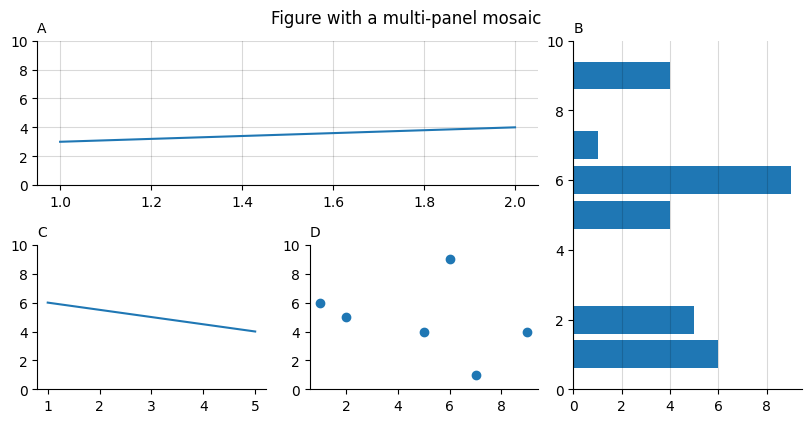

In [5]:
with Figure("Figure with a multi-panel mosaic", size=(8,4), layout=[[0,0,1],[2,3,1]], grid="xy"):
    with Panel("A") as ax:
        ax.plot([1,2],[3,4])
    with Panel("B", grid="x") as ax:
        ax.barh([1,5,6,2,7,9],[6,4,9,5,1,4])
    with Panel("C", grid="") as ax:
        ax.plot([1,5],[6,4])
    with Panel("D", grid="") as ax:
        ax.scatter([1,5,6,2,7,9],[6,4,9,5,1,4])
    for ax in Figure.get_axes():
        ax.set_ylim(0, 10)

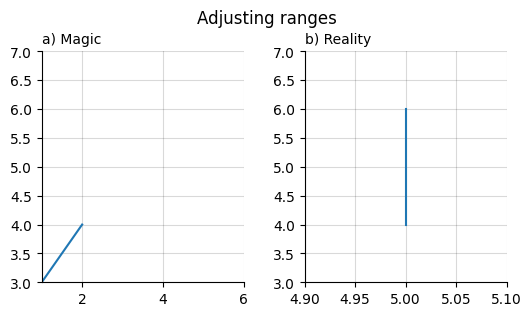

In [6]:
with Figure("Adjusting ranges", layout=(1,2), y_range=(3,7)):
    with Panel("a) Magic", x_range=(1,6)) as ax:
        ax.plot([1,2],[3,4])
    with Panel("b) Reality", extent=[4.9,5.1,3,7]) as ax:
        ax.plot([5,5],[6,4])

In [7]:
import pandas
from datetime import date, timedelta
data = pandas.DataFrame()
data["Apples"]  = [2,5,7,2,6,8,3,6,2,1]
data["Oranges"] = [9,6,2,1,5,7,8,9,4,2]
data.index = [date(2024,1,1)+timedelta(x*2) for x in range(10)]

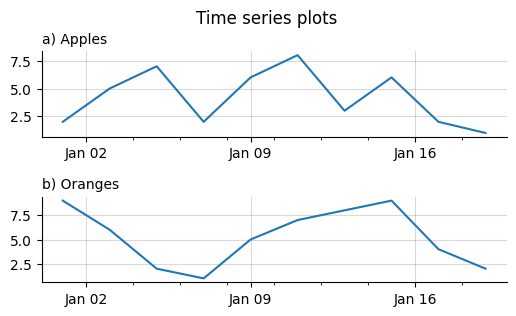

In [13]:
with Figure(
    "Time series plots",
    layout=(2,1),
    x_major_ticks="weeks",
    x_major_fmt="%b %d",
    x_minor_ticks="2days",
):
    with Panel("a) Apples") as ax:
        ax.plot(data.index, data.Apples)
    with Panel("b) Oranges") as ax:
        ax.plot(data.index, data.Oranges)

c:\Users\schroen\AppData\Local\Programs\Python\Python310\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


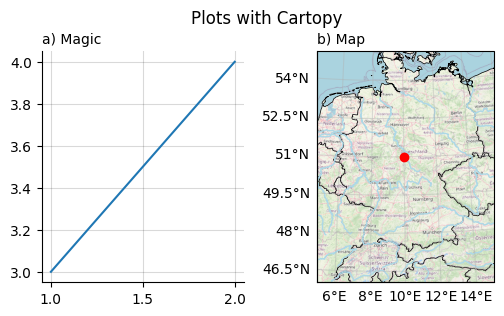

In [9]:
from figurex.cartopy import Cartopy
import cartopy.crs as ccrs
crs = ccrs.EuroPP()

with Figure("Plots with Cartopy",
    layout=(1,2),
    size=(6,3)):
    with Panel("a) Magic") as ax:
        ax.plot([1,2],[3,4])
    with Cartopy(
        "b) Map",
        extent=[5,15,46,55],
        projection=crs,
        tiles="OSM",
        zoom=6
    ) as ax:
        ax.scatter(10,51, zorder=10, color="red", transform=ccrs.PlateCarree())

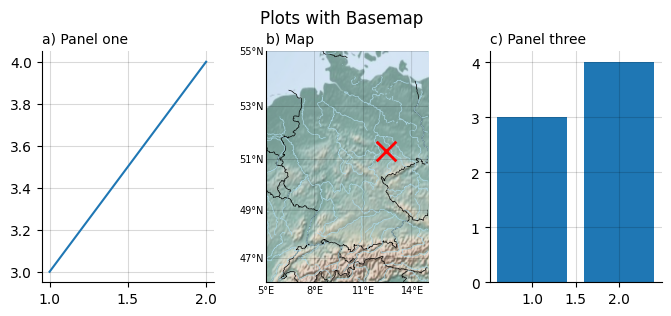

In [10]:
from figurex.basemap import Basemap

with Figure("Plots with Basemap", layout=(1,3), size=(8,3)):
    with Panel("a) Panel one") as ax:
        ax.plot([1,2],[3,4])
    with Basemap(
        "b) Map",
        extent=(5,15,46,55),
        x_range=(5,15,3),
        y_range=(47,56,2),
        features = ["ocean", "countries", "rivers"],
        tiles="relief"
    ) as Map:
        x,y = Map(12.385, 51.331)
        Map.scatter(x, y,  marker="x", zorder=20, color="r", s=200, lw=2)
        
    with Panel("c) Panel three") as ax:
        ax.bar([1,2],[3,4])


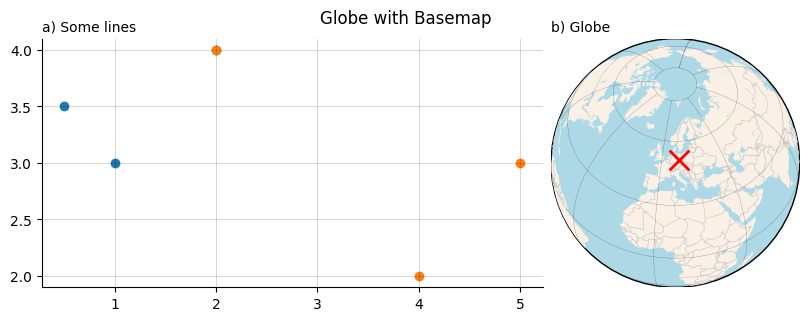

In [11]:
with Figure(
    "Globe with Basemap",
    layout=[[0,0,1]],
    size=(8,3)
):
    with Panel("a) Some lines") as ax:
        ax.scatter([1,2,0.5],[3,4,3.5])
        ax.scatter([4,5,2],[2,3,4])
    with Basemap(
        "b) Globe",
        map_type="globe",
        features=["ocean", "continents", "countries"],
        features_kw=dict(
            countries=dict(linewidth=0.5, color="#CCCCCC")
        ),
    ) as Map:
        x,y = Map(12.385, 51.331)
        Map.scatter(x, y,  marker="x", zorder=20, color="r", s=200, lw=2)


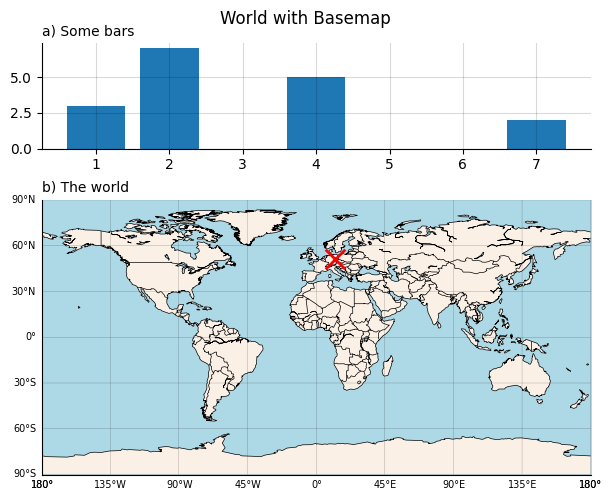

In [12]:
with Figure(
    "World with Basemap",
    layout=[[0],[1],[1],[1]],
    size=(6,5)
):
    with Panel("a) Some bars") as ax:
        ax.bar([1,2,7,4,2],[3,4,2,5,7])
    with Basemap(
        "b) The world",
        map_type="world",
        x_range=(-180, 180, 45),
        y_range=(-90, 90+1, 30),
        features=["ocean", "coast", "continents", "countries"],
    ) as Map:
        x,y = Map(12.385, 51.331)
        Map.scatter(x, y,  marker="x", zorder=20, color="r", s=200, lw=2)
